# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [ ]:
# Code Here
!pip install palmerpenguins
!pip install scikit-learn


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np
from palmerpenguins import load_penguins
from plotnine import *
from re import X
import plotnine as p9

In [ ]:
penguins = load_penguins()
penguins = penguins.dropna()
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [ ]:
#Dummify variables

mylist = ['species', 'sex', 'year', 'island']


penguins_dummified = pd.get_dummies(penguins, columns = mylist)


penguins_dummified

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,sex_female,sex_male,year_2007,year_2008,year_2009,island_Biscoe,island_Dream,island_Torgersen
0,39.1,18.7,181.0,3750.0,1,0,0,0,1,1,0,0,0,0,1
1,39.5,17.4,186.0,3800.0,1,0,0,1,0,1,0,0,0,0,1
2,40.3,18.0,195.0,3250.0,1,0,0,1,0,1,0,0,0,0,1
4,36.7,19.3,193.0,3450.0,1,0,0,1,0,1,0,0,0,0,1
5,39.3,20.6,190.0,3650.0,1,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,0,1,0,0,1,0,0,1,0,1,0
340,43.5,18.1,202.0,3400.0,0,1,0,1,0,0,0,1,0,1,0
341,49.6,18.2,193.0,3775.0,0,1,0,0,1,0,0,1,0,1,0
342,50.8,19.0,210.0,4100.0,0,1,0,0,1,0,0,1,0,1,0


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [ ]:
# Code Here

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#Model 1



y1 = penguins_dummified['bill_depth_mm']
X1 = penguins_dummified[['bill_length_mm', "flipper_length_mm", "body_mass_g"]]

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.25)

lr = LinearRegression()

Model1 = lr.fit(X_train1, y_train1)
y_pred_lr1 = Model1.predict(X_test1)
print(mean_squared_error(y_test1, y_pred_lr1))

r_squared_1 = r2_score(y_test1, y_pred_lr1)
r_squared_1


2.1958145740949266


0.45180075198338876

In [ ]:
#Model 2



y2 = penguins_dummified['bill_depth_mm']
X2 = penguins_dummified[['bill_length_mm', "flipper_length_mm", "body_mass_g", "species_Adelie",
               "species_Chinstrap"]]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.25)

lr = LinearRegression()

Model2 = lr.fit(X_train2, y_train2)
y_pred_lr2 = Model2.predict(X_test2)
print(mean_squared_error(y_test2, y_pred_lr2))

r_squared_2 = r2_score(y_test2, y_pred_lr2)
r_squared_2

0.717722406645649


0.805449478274083

In [ ]:
#Model 3



y3 = penguins_dummified['bill_depth_mm']
X3 = penguins_dummified[['bill_length_mm', "flipper_length_mm", "body_mass_g", "species_Adelie",
               "species_Chinstrap", "sex_female"]]

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.25)

lr = LinearRegression()

Model3 = lr.fit(X_train3, y_train3)
y_pred_lr3 = Model3.predict(X_test3)
print(mean_squared_error(y_test3, y_pred_lr3))

r_squared_3 = r2_score(y_test3, y_pred_lr3)
r_squared_3

0.6339017684749274


0.8468446234690975

In [ ]:
#Model 4



y4 = penguins_dummified['bill_depth_mm']
X4 = penguins_dummified[['bill_length_mm', "flipper_length_mm", "body_mass_g", "species_Adelie",
               "species_Chinstrap", "sex_female", "year_2007", "year_2008", "island_Dream", "island_Biscoe"]]

X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.25)

lr = LinearRegression()

Model4 = lr.fit(X_train4, y_train4)
y_pred_lr4 = Model4.predict(X_test4)
print(mean_squared_error(y_test4, y_pred_lr4))

r_squared_4 = r2_score(y_test4, y_pred_lr4)
r_squared_4

0.6888493117425858


0.8249976419102418

In [ ]:
R_squared_table = pd.DataFrame({
    "RSquared": [0.45180075198338876, 0.805449478274083, 0.8468446234690975, 0.8249976419102418],
    "Number of Predictors": [3, 5, 6, 10]
})

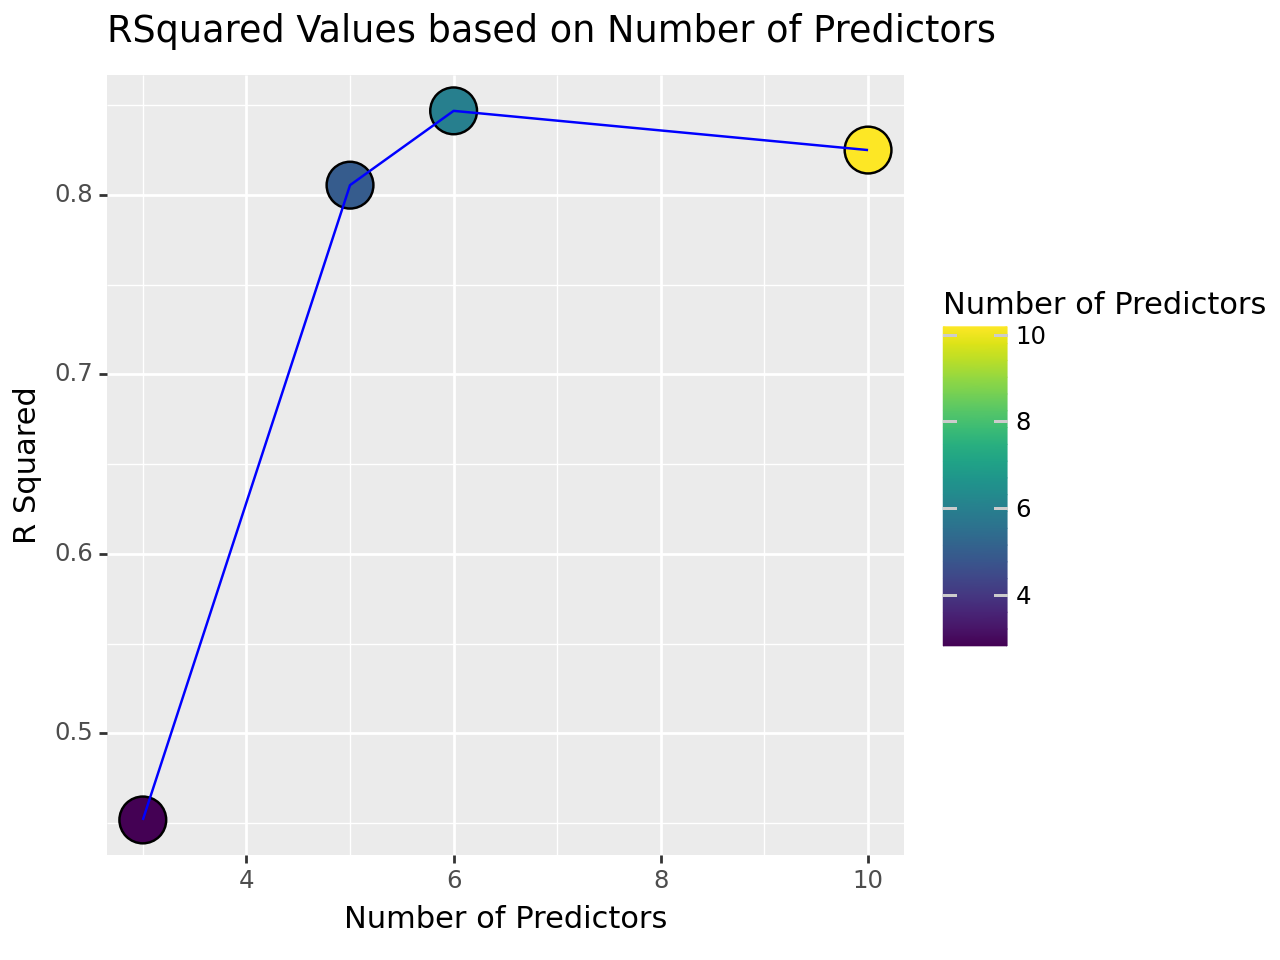

<Figure Size: (640 x 480)>

In [ ]:
plot = (ggplot(R_squared_table, aes(x = "Number of Predictors", y = "RSquared", fill = "Number of Predictors"))
  +geom_point(size = 9)
  +geom_line(aes(group = 1), color = "blue")
  +xlab("Number of Predictors")
  +ylab("R Squared")
  +ggtitle("RSquared Values based on Number of Predictors"))

plot